In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [41]:
#  CSV file Path
url = 'https://raw.githubusercontent.com/redbackoperations/Projects/main/Sports%20Performance%20Analysis/frontend/Cycling%20Analysis/data/extended_activities_with_ftp.csv'
# Read the CSV file 
df = pd.read_csv(url)



In [42]:
# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset including data types and missing values
print(df.info())

# Get summary statistics for numerical columns
print(df.describe())


         Activity Date  Elapsed Time  Distance  Max Heart Rate  \
0  2019-12-13 01:46:07          3859     22.97           139.0   
1  2019-12-20 23:05:01          4852     29.65           133.0   
2  2019-12-21 23:25:29          5817     32.38           139.0   
3  2019-12-24 01:19:17          3851     21.68           140.0   
4  2019-12-26 00:09:08          5843     32.36           131.0   

   Relative Effort  Athlete Weight  Bike Weight  Moving Time  Max Speed  \
0             11.0            84.0          NaN       3811.0       10.2   
1             12.0            84.0          NaN       4693.0       14.1   
2             19.0            84.0          NaN       5601.0       12.0   
3             11.0            84.0          NaN       3816.0       11.4   
4             14.0            80.0          NaN       5740.0       10.9   

   Average Speed  ...  60 Day Maximum Power 30s  60 Day Maximum Power 1.0min  \
0          5.989  ...                     342.1                        2

# Handle missing values and outliers, and preprocess data:


In [43]:
# Handle missing values 
df.fillna(df.mean(), inplace=True)  # fill missing values with column mean






In [44]:
# Define lower and upper thresholds for outlier removal
lower_distance_threshold = 0  # Example: Lower threshold for distance
upper_distance_threshold = 100  # Example: Upper threshold for distance

lower_max_heart_rate_threshold = 0  
upper_max_heart_rate_threshold = 200  

lower_athlete_weight_threshold = 0  
upper_athlete_weight_threshold = 200  

lower_max_speed_threshold = 0  
upper_max_speed_threshold = 50  

lower_elevation_gain_threshold = 0  
upper_elevation_gain_threshold = 1000  

lower_elevation_loss_threshold = 0  
upper_elevation_loss_threshold = 1000  

# Remove rows with extreme values in each column
df = df[(df['Distance'] >= lower_distance_threshold) & (df['Distance'] <= upper_distance_threshold)]
df = df[(df['Max Heart Rate'] >= lower_max_heart_rate_threshold) & (df['Max Heart Rate'] <= upper_max_heart_rate_threshold)]
df = df[(df['Athlete Weight'] >= lower_athlete_weight_threshold) & (df['Athlete Weight'] <= upper_athlete_weight_threshold)]
df = df[(df['Max Speed'] >= lower_max_speed_threshold) & (df['Max Speed'] <= upper_max_speed_threshold)]
df = df[(df['Elevation Gain'] >= lower_elevation_gain_threshold) & (df['Elevation Gain'] <= upper_elevation_gain_threshold)]
df = df[(df['Elevation Loss'] >= lower_elevation_loss_threshold) & (df['Elevation Loss'] <= upper_elevation_loss_threshold)]


   #   Feature Selection
   #   Identifying relevant features that are likely to influence running performance:


In [51]:
# Select relevant features 
relevant_features = ['Distance', 'Max Heart Rate', 'Elevation Gain', 'Average Speed', 'Average Heart Rate', 
                     'Average Watts', 'Calories', 'Average Temperature', 'Average Cadence', 'Max Cadence', ]

# Create a new DataFrame with selected features
df_selected = df[relevant_features]


# We're implementing a linear regression model to predict a target variable, i.e 'Average Speed'. The code outlines the process from data preparation to model evaluation. Here’s a breakdown of each step:
1. Preparing the Data
Choosing Features: First, we take all the columns in the dataset except for 'Average Speed' because we want to use these as inputs to predict 'Average Speed'. These inputs are features.
•Setting the Target: The 'Average Speed' column is what we're trying to predict. This is  the target.
•Splitting the Data: We divide the data into two parts—80% is used for training the model, and 20% is used for testing it. This way, we learn from the larger part and test how well we've learned on the smaller part. We use a setting called random_state to make sure that whenever we split the data, it splits the same way. This makes our experiments repeatable.

2. Training the Model
•Starting the Model: We use  Linear Regression, which helps us draw a line that fits best through our data points.
•Learning from Data: The model learns by looking at the training data (80% of our data) and figuring out how to draw this line. It tries to make the line as close as possible to the actual data points.

3. Making Predictions
•Using the Model: After our model has learned from the training data, we test it using the remaining 20% of the data (the test set). We ask the model to predict 'Average Speed' based on the features in this test data.
 
4. Evaluating the Model
•Checking Errors (Mean Squared Error): This tells us how much the model's predictions are off from the actual speeds. A smaller number here means the model made smaller mistakes, which is good!
•How Well the Model Fits (R-squared Score): This score tells us how well our model's predictions match the actual data. It goes from 0 to 1, where 1 means perfect predictions. Our score, 0.805, means our model is doing quite well, as it can predict 81% of the variation in 'Average Speed' from our features.

5. Conclusion
Our linear regression model did a good job! With an R-squared score of 0.805, it means it can reliably predict the 'Average Speed' based on the features we gave it.In conclusion, the linear regression model isn't just for checking what impacts a runner's speed; it actually helps us plan better training and recovery strategies to make a runner's performance better.


In [46]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For initializing and training a linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance using MSE and R^2 score

# Split the data into features (X) and target variable (y)
X_features = df_selected.drop('Average Speed', axis=1)  # Features (excluding 'Average Speed' which is the target variable)
y_target = df_selected['Average Speed']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=40)

# Initialize the linear regression model
linear_model = LinearRegression()  # Create an instance of LinearRegression model

# Train the model on the training data
linear_model.fit(X_train, y_train)  # Fit the model to the training data

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)  # Use the trained model to make predictions on the test data

# Evaluate the model's performance
mean_squared_error_value = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r_squared_score = r2_score(y_test, y_pred)  # Calculate R-squared score

# Print evaluation metrics
print("Mean Squared Error:", mean_squared_error_value)  # Print Mean Squared Error
print("R-squared Score:", r_squared_score)  # Print R-squared Score


Mean Squared Error: 0.13803885583843215
R-squared Score: 0.8053064844082769


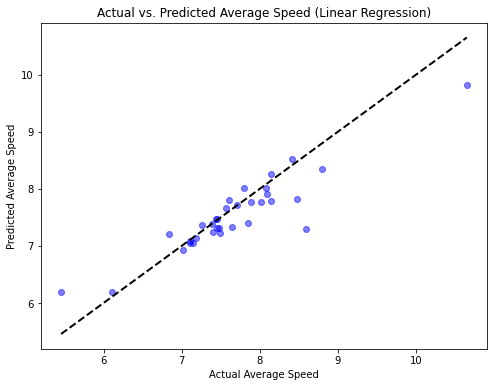

In [47]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Average Speed')
plt.ylabel('Predicted Average Speed')
plt.title('Actual vs. Predicted Average Speed (Linear Regression)')
plt.show()


# Preparing the Data
•	Choosing Features: We select all the columns in our dataset except for 'Distance' because these are the inputs (features) we'll use to predict 'Distance'.
•	Setting the Target: The 'Distance' column is our target, which is what we're trying to predict.
•	Splitting the Data: We split our data into two parts: 80% for training the model and 20% for testing it. This allows us to learn from 80% of the data and validate our learning on the other 20%. The random_state setting ensures that this split is consistent every time we run the code, making our experiments repeatable.
# Training the Model
•	Starting the Model: We use Linear Regression, a statistical method that tries to draw a straight line that best fits the data points.
•	Learning from Data: The model looks at the training data to understand how to best draw this line by minimizing errors between the predicted distances and actual distances.
# Making Predictions
•	Using the Model: After training, we use the model to predict the 'Distance' on the test set, which is the remaining 20% of the data. This step checks how well the model can apply what it learned to new, unseen data.
# Evaluating the Model
•	Checking Errors (Mean Squared Error): We calculate the mean squared error to see on average how much the model's predictions differ from the actual distances. Lower values are better as they indicate less error.
•	How Well the Model Fits (R-squared Score): This score tells us how well the model's predictions correspond to the actual distances. It ranges from 0 to 1, where a score close to 1 means the predictions are very accurate. In this case, the R-squared value gives us an idea of how much of the variation in 'Distance' can be explained by the features we used.
# Cross-Validation
•	Testing Reliability: We also perform cross-validation, which involves dividing the data into several parts and training/testing the model multiple times. This helps to ensure that our model performs well not just on one specific set of data but generally across different subsets.
# Visualizing Predictions
•	Plotting Results: We plot the actual distances against the predicted distances to visually assess how close the predictions are to the real data.
# Conclusion
The obtained MSE suggests there is a noticeable average error in the model's predictions, signaling potential areas for model improvement or consideration of more complex modeling approaches.
An R-squared score of 0.621 is moderately good, indicating that while the model captures a significant portion of the variance in distance, there is still some room for improvement.

In [105]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For initializing and training a linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance using MSE and R^2 score
# Split the data into features (X_distance) and target variable ('Distance')
X_distance = df_selected.drop('Distance', axis=1)  # Features (excluding 'Distance')
y_distance = df_selected['Distance']  # Target variable

# Split the data into training and testing sets for 'Distance' prediction
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance, y_distance, test_size=0.2, random_state=42)

# Initialize the linear regression model for 'Distance' prediction
model_distance = LinearRegression()

# Train the model on the training data for 'Distance' prediction
model_distance.fit(X_train_distance, y_train_distance)

# Make predictions on the testing data for 'Distance' prediction
y_pred_distance = model_distance.predict(X_test_distance)

# Evaluate the model's performance for 'Distance' prediction
mse_distance = mean_squared_error(y_test_distance, y_pred_distance)
r2_distance = r2_score(y_test_distance, y_pred_distance)

print("Mean Squared Error (Distance):", mse_distance)
print("R-squared Score (Distance):", r2_distance)



Mean Squared Error (Distance): 160.40866416333822
R-squared Score (Distance): 0.3997862674192143


In [106]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model_distance, X_distance, y_distance, cv=5, scoring='neg_mean_squared_error')

# Convert MSE scores to positive values
mse_cv = -cv_scores

# Print the cross-validation MSE scores
print("Cross-Validation MSE Scores:", mse_scores)


# Calculate mean and standard deviation of MSE scores
mean_mse_cv = mse_cv.mean()
std_mse_cv = mse_cv.std()

# Print mean and standard deviation of MSE scores
print("Mean Squared Error (Cross-Validation):", mean_mse_cv)
print("Standard Deviation of MSE (Cross-Validation):", std_mse_cv)


Cross-Validation MSE Scores: [135.8448934  362.19970049  91.58456579  60.77173977 195.51918115]
Mean Squared Error (Cross-Validation): 169.71399624366978
Standard Deviation of MSE (Cross-Validation): 106.51750190110569


In [107]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mean_mse_cv = mse_cv.mean()

# Fit the model on the entire dataset
model_distance.fit(X_distance, y_distance)

# Predict the target variable on the entire dataset
y_pred = model_distance.predict(X_distance)

# Calculate the mean squared error (MSE) 
mse = mean_squared_error(y_distance, y_pred) 

# Calculate the R-squared score
r2 = r2_score(y_distance, y_pred)

print("Mean Squared Error:",  mse)
print("R-squared Score:", r2)


Mean Squared Error: 107.24335665914812
R-squared Score: 0.620916759486467


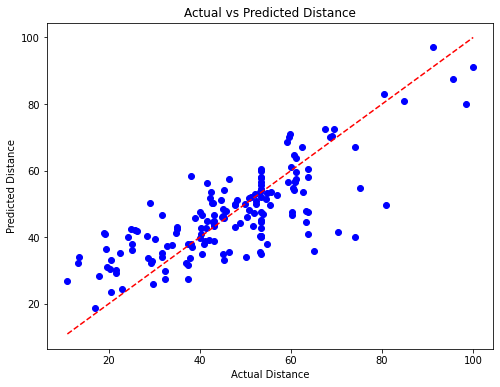

In [108]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_distance, y_pred, color='blue')
plt.plot([y_distance.min(), y_distance.max()], [y_distance.min(), y_distance.max()], linestyle='--', color='red')
plt.xlabel('Actual Distance')
plt.ylabel('Predicted Distance')
plt.title('Actual vs Predicted Distance')
plt.show()


# Preparing the Data
•	Choosing Features: We start by selecting all the columns in the dataset except for 'Average Heart Rate' as these will serve as inputs (features) to predict 'Average Heart Rate'.
•	Setting the Target: The 'Average Heart Rate' column is set as the target variable. This is what we aim to predict using our model.
•	Splitting the Data: We divide the data into training (80%) and testing (20%) portions. A larger portion is used for training to learn effectively, while a smaller portion is used to test and see how well the model has learned. The random_state ensures that the data splits the same way every time, making our results consistent and repeatable.
# Training the Model
•	Starting the Model: We use a Linear Regression model because it draw a straight line that best fits our data points.
•	Learning from Data: The model observes the training data to learn how to predict 'Average Heart Rate' by minimizing the error between the predicted and actual heart rates.
# Making Predictions
•	Using the Model: After learning from the training data, the model is tested using the test set, which is the remaining 20% of the data. Here, the model uses the features to predict 'Average Heart Rate'.
# Evaluating the Model
•	Checking Errors (Mean Squared Error): This metric measures how far the model's predictions are from the actual heart rates.
•	How Well the Model Fits (R-squared Score): This score ranges from 0 to 1, where 1 indicates perfect prediction accuracy. A higher score shows that our model predicts 'Average Heart Rate' quite well based on the input features.
# Cross-Validation
•	Testing Model Reliability: We perform cross-validation by splitting the data into five parts, training and testing the model multiple times. This helps confirm the model's effectiveness across different subsets of data.
•	Reviewing Cross-Validation Results: We calculate the average and variability of the mean squared errors from each validation to assess the model's consistency and reliability.
# Visualizing Predictions
•	Plotting Actual vs Predicted: A scatter plot visualizes the relationship between actual and predicted 'Average Heart Rate', helping to visually assess how closely the predictions match the actual values.
# conclusion
The model does an acceptable job of predicting "Average Heart Rate," these findings also point up possible areas for improvement. One may consider about using various modeling techniques, adding more or more subtle characteristics, or adjusting the model's parameters in order to increase accuracy. This model can be improved upon to increase its predictive power in real-world applications. It provides a good foundation for understanding the elements that affect heart rate.


In [86]:
# Split the data into features (X_heart_rate) and target variable ('Average Heart Rate')
X_heart_rate = df_selecteddrop('Average Heart Rate', axis=1)  # Features (excluding 'Average Heart Rate')
y_heart_rate = df_['Average Heart Rate']  # Target variable

# Split the data into training and testing sets for 'Average Heart Rate' prediction
X_train_heart_rate, X_test_heart_rate, y_train_heart_rate, y_test_heart_rate = train_test_split(X_heart_rate, y_heart_rate, test_size=0.2, random_state=42)

# Initialize the linear regression model for 'Average Heart Rate' prediction
model_heart_rate = LinearRegression()

# Train the model on the training data for 'Average Heart Rate' prediction
model_heart_rate.fit(X_train_heart_rate, y_train_heart_rate)

# Make predictions on the testing data for 'Average Heart Rate' prediction
y_pred_heart_rate = model_heart_rate.predict(X_test_heart_rate)

# Evaluate the model's performance for 'Average Heart Rate' prediction
mse_heart_rate = mean_squared_error(y_test_heart_rate, y_pred_heart_rate)
r2_heart_rate = r2_score(y_test_heart_rate, y_pred_heart_rate)

print("Mean Squared Error (Average Heart Rate):", mse_heart_rate)
print("R-squared Score (Average Heart Rate):", r2_heart_rate)



Mean Squared Error (Average Heart Rate): 57.60878453126738
R-squared Score (Average Heart Rate): 0.7623812207061684


In [87]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores_heart_rate = cross_val_score(model_heart_rate, X_heart_rate, y_heart_rate, cv=5, scoring='neg_mean_squared_error')

# Convert MSE scores to positive values
mse_cv_heart_rate = -cv_scores_heart_rate


# Calculate mean and standard deviation of MSE scores
mean_mse_cv_heart_rate = mse_cv_heart_rate.mean()
std_mse_cv_heart_rate = mse_cv_heart_rate.std()

# Print mean and standard deviation of MSE scores
print("Mean Squared Error (Cross-Validation - Average Heart Rate):", mean_mse_cv_heart_rate)
print("Standard Deviation of MSE (Cross-Validation - Average Heart Rate):", std_mse_cv_heart_rate)


Mean Squared Error (Cross-Validation - Average Heart Rate): 62.98914312783286
Standard Deviation of MSE (Cross-Validation - Average Heart Rate): 35.877754221541686


In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# Fit the model on the entire dataset
model_heart_rate.fit(X_heart_rate, y_heart_rate)

# Predict the target variable on the entire dataset
y_pred_heart_rate = model_heart_rate.predict(X_heart_rate)

# Calculate the mean squared error (MSE)
mse_heart_rate = mean_squared_error(y_heart_rate, y_pred_heart_rate)

# Calculate the R-squared score
r2_heart_rate = r2_score(y_heart_rate, y_pred_heart_rate)

print("Mean Squared Error (Average Heart Rate):", mse_heart_rate)
print("R-squared Score (Average Heart Rate):", r2_heart_rate)


Mean Squared Error (Average Heart Rate): 43.16532605466734
R-squared Score (Average Heart Rate): 0.6854664489039852


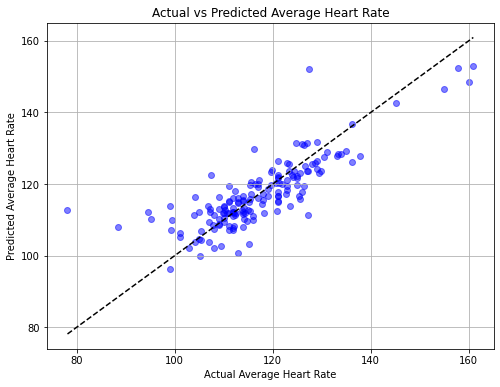

In [120]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_heart_rate, y_pred_heart_rate, color='blue', alpha=0.5)
plt.plot([y_heart_rate.min(), y_heart_rate.max()], [y_heart_rate.min(), y_heart_rate.max()], 'k--') 
plt.xlabel('Actual Average Heart Rate')
plt.ylabel('Predicted Average Heart Rate')
plt.title('Actual vs Predicted Average Heart Rate')
plt.grid(True)
plt.show()